# Binomial and negative binomial distributions

An exploration of binomial and negative binomial distributions in response to a question on Reddit.

Copyright 2016 Allen Downey

MIT License: http://opensource.org/licenses/MIT

In [102]:
from __future__ import print_function, division

import thinkplot
from thinkstats2 import Pmf, Cdf

from scipy import stats
from scipy import special

%matplotlib inline

Here's a [question from Reddit](https://www.reddit.com/r/statistics/comments/4ijzkm/number_of_selections_with_replacement_before/):

>How do I calculate the distribution of the number of selections (with replacement) 
I need to make before obtaining `k`? For example, let's say I am picking marbles from 
a bag with replacement. There is a 10% chance of green and 90% of black. I want `k=5` green 
marbles. What is the distribution number of times I need to take a marble before getting 5? 

>I believe this is a geometric distribution. I see how to calculate the cumulative 
>probability given `n` picks, but I would like to generalize it so that for any value of `k` 
>(number of marbles I want), I can tell you the mean, 10% and 90% probability for the 
>number of times I need to pick from it.

>Another way of saying this is, how many times do I need to pull on a slot machine 
>before it pays out given that each pull is independent?

Note: I've changed the notation in the question to be consistent with convention.


### Solution

There are two ways to solve this problem.  One is to relate the desired distribution to the binomial distribution.  

If the probability of success on every trial is `p`, the probability of getting the `k`th success on the `n`th trial is

    PMF(n; k, p) = BinomialPMF(k-1; n-1, p) p

That is, the probability of getting `k-1` successes in `n-1` trials, times the probability of getting the `k`th success on the `n`th trial.

Here's a function that computes it:

In [85]:
def MakePmfUsingBinom(k, p, high=100):
    pmf = Pmf()
    for n in range(1, high):
        pmf[n] = stats.binom.pmf(k-1, n-1, p) * p
    return pmf

And here's an example using the parameters in the question.

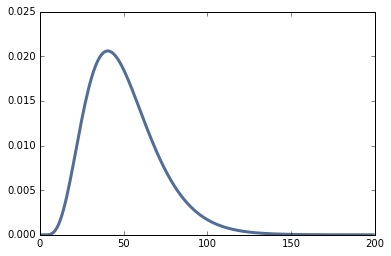

In [86]:
pmf = MakePmfUsingBinom(5, 0.1, 200)
thinkplot.Pdf(pmf)

We can solve the same problem using the negative binomial distribution, but it requires some translation from the parameters of the problem to the conventional parameters of the binomial distribution.

If the probability of success on every trial is `p`, the probability of getting the `k`th success on the `n`th trial is

    PMF(n; k, p) = NegativeBinomialPMF(n-k; k, p) p

That is, the probability of `n-k` non-terminal events on the way to getting the `k`th terminal event.

Here's a function that computes it:

In [103]:
def MakePmfUsingNbinom(k, p, high=100):
    pmf = Pmf()
    for n in range(1, high):
        r = n-k
        pmf[n] = stats.nbinom.pmf(r, k, p)
    return pmf

Here's the same example:

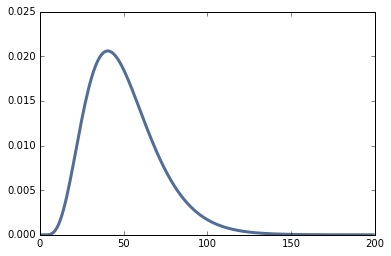

In [104]:
pmf2 = MakePmfUsingNbinom(5, 0.1, 200)
thinkplot.Pdf(pmf2)

And confirmation that the results are the same within floating point error.

In [107]:
diffs = [abs(pmf[n] - pmf2[n]) for n in pmf]
max(diffs)

8.6736173798840355e-17

Using the PMF, we can compute the mean and standard deviation:

In [108]:
pmf.Mean(), pmf.Std()

(49.998064403376738, 21.207570382894403)

To compute percentiles, we can convert to a CDF (which just adds up the cumulative probabilities)

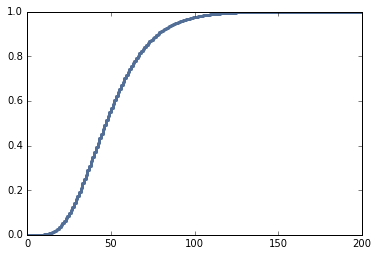

In [109]:
cdf = Cdf(pmf)
scale = thinkplot.Cdf(cdf)

And here are the 10th and 90th percentiles.

In [110]:
cdf.Percentile(90)

78